# Catching Heuristics Are Robust to Systematic Disturbances  and Can Be Found by Reinforcement Learning

## Supplementary Material: Proofs for Chapman's Strategy (Section 4)

This material accompanies my doctoral thesis *On Decomposability in Robot Reinforcement Learning* and the paper *Catching Heuristics Are Robust to Systematic Disturbances  and Can Be Found by Reinforcement Learning*.

&copy; 2017 Sebastian Höfer



In this notebook, we verify the proofs regarding Chapman's strategy in Section 4 of the paper (Thesis Chapter 4).

In [1]:
from IPython.display import Image, display

import sympy as sp
import numpy as np

sp.init_printing()

import os
import sys
# load scripts
#sys.path.append(os.path.join(os.getcwd(), "../../src"))
#import multi_experiment_plot
#from utils import pdfcrop

def concrete_case(formula, V_, theta_, yb0_=0):
	global GRAVITY
	return formula.subs(g,GRAVITY).subs(V,V_).subs(theta,theta_).subs(yb0,yb0_)

def concrete_trajectory(formula, V_, theta_, T_, yb0_=0, N=100):
	time = np.linspace(0, float(T_), N)
	return np.array(map(lambda t_: concrete_case(formula, V_, theta_, yb0_).subs(t, t_), time)), time, time[1]-time[0]

In [2]:
%pylab inline

import matplotlib
#matplotlib.rcParams['ps.useafm'] = True
#matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r"\usepackage{charter}, \usepackage{tgheros}, \renewcommand*\familydefault{\sfdefault}"
matplotlib.rcParams['figure.autolayout'] = True
matplotlib.rcParams['font.size'] = 24

#from matplotlib import rc
#rc('font',**{'family':'serif','serif':['Computer Modern Roman'], 'size': 30})

matplotlib.use('pdf')

Populating the interactive namespace from numpy and matplotlib


/Users/Hoefer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
def plot_surface(fig, ax, title, X, Y, Z, labels, linewidth=0.2, vlim=None, zlim=[None,None], contour=False, elev=20, azi=45):
  if vlim is None:
    vlim = zlim
  ax.set_title(title)
  #ax = fig.gca(projection='3d')

  xlabelpad, ylabelpad, zlabelpad = [35,35,10]

  if zlim[1] is not None:
    Z[np.where(Z > zlim[1])] = zlim[1]
  
  surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, vmin=vlim[0], vmax=vlim[1], 
        linewidth=linewidth, antialiased=False, )  
  ax.zaxis.set_major_locator(LinearLocator(10))
  ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
  ax.set_xlabel(labels[0], labelpad=xlabelpad)
  ax.set_ylabel(labels[1], labelpad=ylabelpad)
  ax.set_zlabel(labels[2], labelpad=zlabelpad)


  if zlim[0] == 0 and zlim[1] == 5:
    # hacky: for agent_ball_distance
    ax.set_zticks([0,1,2,3,4,5])
    ax.set_zticklabels(map (lambda x: "$%d$" % x, [0,1,2,3,4,5]))

  # reformat ticklabels
  for ticks_and_labels, setter, in zip([ zip(ax.get_xticks(), ax.get_xticklabels()),
                                        zip(ax.get_yticks(), ax.get_yticklabels()),
                                        zip(ax.get_zticks(), ax.get_zticklabels())],
                                        (ax.set_xticklabels, ax.set_yticklabels, ax.set_zticklabels)):
    ticklbls = []
    fnt_size = "huge"

    tkz = zip(*ticks_and_labels)[0]
    tick_range =  np.max(tkz) - np.min(tkz)

    for tick, lbl in ticks_and_labels:
      #txt = lbl.get_text()
      #if txt == "":
      if tick_range <= 1.5:
        tl = "%.1f" % tick
      else:
        tl = "%d" % tick
      txt = r"\%s{$%s$}" % (fnt_size, tl)
      #else:
      #  txt = r"\%s{%s}" % (fnt_size, tick)
      lbl.set_text(txt)
      ticklbls.append(lbl)
    setter(ticklbls)

  # move y ticks a bit to the left, so the -15 does not collide
  [t.set_ha('right') for t in ax.get_yticklabels()]

  vmin = 0.
  vmax = 1.
  
  ax.view_init(elev, azi)
  
  if contour:
    if np.min(Z) != np.max(Z):
      cset = ax.contour(X, Y, Z, zdir='z', offset=np.min(Z), cmap=cm.coolwarm)
    if np.min(X) != np.max(X):
      #cset = ax.contour(X, Y, Z, zdir='x', offset=np.min(X), cmap=cm.coolwarm)
      cset = ax.contour(X, Y, Z, zdir='x', offset=np.max(X), cmap=cm.coolwarm) # project to opposite side
    if np.min(Y) != np.max(Y):
      #cset = ax.contour(X, Y, Z, zdir='y', offset=np.min(Y), cmap=cm.coolwarm)
      cset = ax.contour(X, Y, Z, zdir='y', offset=np.max(Y), cmap=cm.coolwarm) # project to opposite side
  
  if zlim != [None,None]:
    ax.set_zlim3d(zlim[0], zlim[1])
  fig.colorbar(surf, shrink=0.75, aspect=20)

  return ax

import subprocess

def pdfcrop(path):
  #call = ["perl", "/usr/bin/pdfcrop", path, path  ]
  call = ["pdfcrop", path, path  ]
  print " ".join(call)
  pipe = subprocess.Popen(call)
  return pipe


In [4]:
# HElPER FUNCTIONS
# sympy has problems of simplifying (V^2 sin(theta)^2)^{1/2} to V sin(theta)
def sympy_sqrt_fix(formula):
#  return sp.simplify(formula.subs((V**2*sp.sin(theta)**2)**(0.5), V*sp.sin(theta)))
  return sp.simplify(formula.subs(sp.sqrt( (V**2) * (sp.sin(theta))**2), V*sp.sin(theta)))
def zero_yb0(formula, val=0):
  return sympy_sqrt_fix(formula.subs(yb0,val))


GRAVITY=9.81

# Variable
t, yb0, theta, psi, V, g, rv = sp.symbols("t, b_{y0}, \\varphi, \\psi, \\nu, g, \\vvaref")
#yb0 = 0
yb = V*sp.sin(theta)*t - 0.5*g*t*t + yb0
xb = V*sp.cos(theta)*t

T = sp.solve(yb, t)[1]
R = xb.subs(t, T)

$\newcommand{\vva}{\theta}
\newcommand{\dvva}{\dot{\theta}}
\newcommand{\ddvva}{\ddot{\theta}}
\newcommand{\dddvva}{\dddot{\theta}}
\newcommand{\vvaref}{\dot{\theta}_\mathrm{ref}}
\newcommand{\vvarefzero}{\dot{\theta}_{\mathrm{ref},0}}
\newcommand{\vvarefcon}{{\vvaref^*}}
\newcommand{\vvarefincon}{{\vvaref^{\sim}}}
\newcommand{\xyzb}{\mathbf{b}}
\newcommand{\dxyzb}{\dot{\mathbf{b}}}
\newcommand{\ddxyzb}{\ddot{\mathbf{b}}}
\newcommand{\xb}{{b_x}}
\newcommand{\dxb}{{\dot{b}_x}}
\newcommand{\ddxb}{{\dot{b}_x}}
\newcommand{\yb}{{b_y}}
\newcommand{\dyb}{{\dot{b}_y}}
\newcommand{\ddyb}{{\ddot{b}_y}}
\newcommand{\zb}{{b_z}}
\newcommand{\dzb}{{\dot{b}_z}}
\newcommand{\ddzb}{{\ddot{b}_z}}
\newcommand{\xbzero}{{b_{x,0}}}
\newcommand{\ybzero}{{b_{y,0}}}
\newcommand{\dxbzero}{{\dot{b}_{x,0}}}
\newcommand{\dybzero}{{\dot{b}_{y,0}}}
\newcommand{\xyza}{\mathbf{a}}
\newcommand{\dxyza}{\dot{\mathbf{a}}}
\newcommand{\ddxyza}{\ddot{\mathbf{a}}}
\newcommand{\xa}{{a_x}}
\newcommand{\dxa}{{\ddot{a}_x}}
\newcommand{\ddxa}{{\ddot{a}_x}}
\newcommand{\za}{{a_z}}
\newcommand{\dza}{{\ddot{a}_z}}
\newcommand{\ddza}{{\ddot{a}_z}}
\newcommand{\xazero}{{a_{x,0}}}
\newcommand{\aref}{a_\mathrm{ref}}
\newcommand{\daref}{\dot{a}_\mathrm{ref}}
\newcommand{\arefcon}{{\aref^*}}
\newcommand{\darefcon}{{\daref^*}}
\newcommand{\azero}{{a_0}}
\newcommand{\azeroincon}{{a_0^{\sim}}}
\newcommand{\damax}{\dot{a}_\mathrm{max}}
\newcommand{\ddamax}{\ddot{a}_\mathrm{max}}
\newcommand{\vvareftext}{tangent reference velocity\xspace}
\newcommand{\areftext}{agent reference\xspace}
\newcommand{\refcontext}{consistent\xspace}
\newcommand{\refincontext}{inconsistent\xspace}
\newcommand{\refcontextup}{Consistent\xspace}$

## Theorem 4.1.1 (Chapman's Proof) 

We begin by formalizing the ball's trajectory. We assume that it is a parabola, parametrized by initial ball throwing velocity $V$, throwing angle $\theta$ and initial height $y_{b,0}$:
\begin{align}
  b_x(t) &= \nu \cos(\varphi) t + b_{x,0},\\
  b_y(t) &= \nu \sin(\varphi) t - \frac{1}{2} g t^2 + b_{y,0}.
\end{align}
W.l.o.g. we assume $b_x(0)=b_{x,0}=:=0$ and $b_y(0)=b_{y,0} \geq 0$.

We compute the impact time $T$ and the impact position (or ball range) $R$:


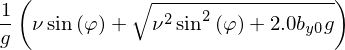

In [5]:
T

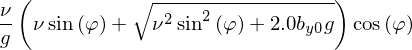

In [6]:
R

In the following we will inspect the case $b_{y,0}=0$ 

Then the previous expressions simplify to:

$T=$

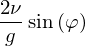

In [7]:
T = zero_yb0(T)
T

$R=$

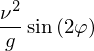

In [8]:
R = zero_yb0(R)
R

We now relate the tangent reference velocity $\vvaref$ to the motion of agent and ball, i.e. $\dvva=0$.

<i>Ansatz</i>: Assume $\tan \alpha$ as seen by the agent is a linear function with constant slope $\vvaref$.
\begin{align}
\frac{\yb(t)}{\aref(t)-\xb(t)} &= \vvaref t + \vva_{0} \\
&= \vvaref\ t + \frac{\ybzero}{\azero}  \qquad (1).
\end{align}
with $\aref(0)=\azero \neq 0$, $\xb(0)=0$. 

<!--
When does this equation have a solution for $rv$ or $a(t)$? 

<ul>
<li>$t=0, y_{b,0}=0$<br/>
If $y_b(0)=y_{b,0}=0$, we get $0=0$ so we get infinitely many solutions. 
</li>
<li>$t=0, y_{b,0}\neq0$<br/>
We do not get a solution for $rv$ but we get $\frac{y_b(t)}{a(t)-x_b(t)} = \frac{y_{b,0}}{a_0}$ which is true by assumption. 
</li>
<li>$t>0, y_b(t)=0, y_{b,0}=0$<br/>
Since $y_b$ has only two null points, $t=T$. Now depending on $a(T)$ either $rv$ is undefined (if $a(T)=R$) or $rv=0$. WHY?
</li>
<li>$t=T, y_{b,0}=0$<br/>
Equivalent to last case. 
</li>
</ul>
-->

<!--
Note that this equation has infinitely many solutions for $t=0$.

We see that this equation is undefined when $a_0=0$, i.e. when the agent and the ball are at the same horizontal position at time $t=0$.
-->

In [9]:
# Set-up Eq.(1) 

a0 = sp.symbols("a_0")
a = sp.Function(r"\aref")(t)

# we know rv0 = yb(0)/(a(0)-xb) = yb(0)/a(0) = yb0/a0   (since xb=0)
rv0 = yb0/a0

tan_alpha_eq =  yb/(a-xb)
linear_rv_eq = rv*t + rv0
eq = tan_alpha_eq - linear_rv_eq

We now solve this Eq. (1) for $\aref(t)$ and verify that $\aref(T) = R$.

$\aref(t)=$

In [10]:
#a_expr = sp.solve(eq, a)[0]
a_expr = sp.solve(zero_yb0(eq), a)[0]
#print sp.latex(a_expr)
a_expr

/Users/Hoefer/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


\nu⋅\vvaref⋅t⋅cos(\varphi) + \nu⋅sin(\varphi) - 0.5⋅g⋅t
───────────────────────────────────────────────────────
                        \vvaref                        

In [11]:
# agent at terminal time
#sp.simplify(a_expr.subs(t, zero_yb0(T)))

$\aref(T) - R=$

In [12]:
sp.simplify(a_expr.subs(t, T) - R)

$a(0)=$

In [13]:
sp.simplify(a_expr.subs(t, 0))
#a_expr.subs(t, 0)

\nu⋅sin(\varphi)
────────────────
    \vvaref     

That shows that $\aref(T) = R$. We can verify that this holds in the limit, too.

Assume $\ybzero=0$ and $t=T-\delta$, i.e. shortly before impact. How far is the agent away from impact point $R$?

In [14]:
delta = sp.symbols("delta")
ateps_m_R = sp.simplify(zero_yb0(a_expr.subs(t, T-delta) - R))
#ateps_m_R = sp.simplify(a_expr.subs(t, T-delta) - R)
##print sp.latex(ateps_m_R)
ateps_m_R
#sp.limit(ateps_m_R, delta, 0)


                          0.5⋅δ⋅g
-1.0⋅\nu⋅δ⋅cos(\varphi) + ───────
                          \vvaref

In [15]:
# re-arrange
ateps_m_R = sp.simplify(zero_yb0(a_expr.subs(t, T-delta) - R))
ateps_m_R2 = delta * (-V*sp.cos(theta) + 0.5*g/rv)
assert(sp.simplify(ateps_m_R2-ateps_m_R) == 0.)
##print sp.latex(ateps_m_R2)
ateps_m_R2

  ⎛                     0.5⋅g ⎞
δ⋅⎜-\nu⋅cos(\varphi) + ───────⎟
  ⎝                    \vvaref⎠

$= \aref(T-\delta) - R$. We see that $\delta$ is multiplied with a constant expression which depends on $\vvaref$. Hence, for $\delta \rightarrow 0: |\aref(T-\delta)-R| \rightarrow 0$.

However, we still need to make sure to choose $\vvaref$ s.t. $\aref(0)=a_0$.

## Lemma 4.1.2 

If we use Chapman's result, the *consistent* tangent velocity reference computes as $\vvarefcon=$

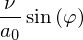

In [16]:
rv_opt = sp.solve(zero_yb0(a_expr-a0).subs(t,0), rv)[0]
rv_opt

and plug this into $\aref(\delta)$, i.e. shortly after the ball is thrown, we obtain:

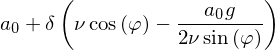

In [17]:
a_delta_raw = zero_yb0(a_expr.subs(t, delta).subs(rv, rv_opt))
# re-arrange
a_delta = a0 + delta * (V*sp.cos(theta) - a0*g/(2*V*sp.sin(theta)))
assert (sp.simplify(a_delta - a_delta_raw) == 0.)
a_delta

As $\delta \rightarrow 0$ only the term $a_0$ remains.

## Lemma 4.1.3

So there exists a unique $\vvaref$ which fulfills the constraints $\aref(0)=a_0, \aref(T)=R$. 

What does the *consistent* agent reference trajectory $\arefcon(t)$ look like?

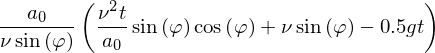

In [18]:
#at_rvstar_yb0_zero = a_delta.subs(delta, t)
#print sp.latex(at_rvstar_yb0_zero)
#at_rvstar_yb0_zero

at_rvstar_yb0_zero = a_expr.subs(rv, rv_opt)
##print sp.latex(at_rvstar_yb0_zero)
at_rvstar_yb0_zero

$=\arefcon(t)$. We see that its derivative is constant:

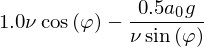

In [19]:
#adot0 = zero_yb0( (R - a0 ) / T)
at_rvstar_yb0_zero_diff = sp.diff(at_rvstar_yb0_zero, t)
at_rvstar_yb0_zero_diff = sp.simplify(at_rvstar_yb0_zero_diff)
##print sp.latex(at_rvstar_yb0_zero_diff)
at_rvstar_yb0_zero_diff
#sp.simplify(at_rvstar_yb0_zero_diff - adot0)

$= \darefcon$.

It corresponds to the velocity the agent needs to arrive at $R$ at time $T$ starting at $a_0$ at time $t=0$, which is $\frac{R-a_0}{T}$:

In [20]:
adot0 = zero_yb0( (R - a0 ) / T)
sp.simplify(at_rvstar_yb0_zero_diff - adot0)

This shows that the consistent agent reference trajectory is constant.

Note that this result is similar to (Chapman, 1968), Eq. (9).

### Figure 4.1:  Plotting $\vvaref$

Given this expression we can now plot what the consistent $\vvarefcon$ for reaching the target looks like, with varying throwing angle $\nu$ and distance from impact point $d = -R+a_0$. We keep the throwing angle fixed at $\varphi=\frac{\pi}{4}$ since it is only a scaling factor ($\sin \frac{\pi}{4} \approx 0.7$):

/Users/Hoefer/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


pdfcrop v_r_optimal_pi4.pdf v_r_optimal_pi4.pdf


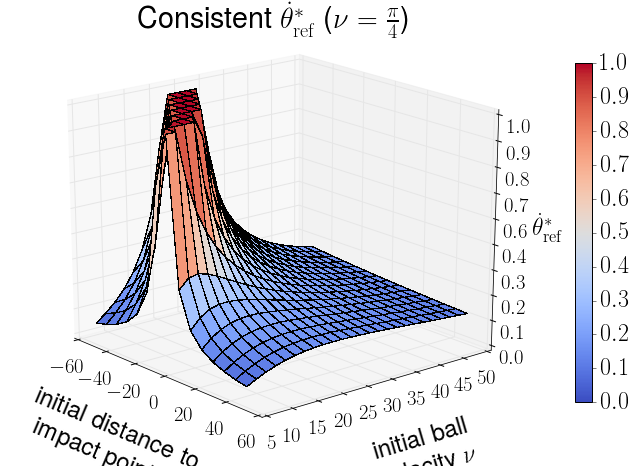

In [21]:
#from matplotlib import rcParams
#rcParams.update({'figure.subplot.bottom': 0.1})

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

#%pylab tk

X = np.linspace(-50, 50, 15)  # distance d
Y = np.linspace(5, 50, 25)    # ball velocity V 

expr = rv_opt

t_ = 0
#theta_ = np.pi/4
yb0_ = 0.0

for theta_ in [np.pi/4]: #[np.pi/4, np.pi/8, 3*np.pi/8]:

    #fig = plt.figure(figsize=(15,10))
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')


    DIFF = np.zeros( (len(X), len(Y)) ) 
    for i,d_ in enumerate(X):
        for j,V_ in enumerate(Y):

            R_ = concrete_case(R, V_, theta_, yb0_)
            T_ = concrete_case(T, V_, theta_, yb0_)
            cc = concrete_case(expr,  V_, theta_, yb0_).subs(t, t_)

            val = cc.subs(a0,R_+d_).evalf()
            DIFF[i,j] = np.abs(float(val)) if val != sp.zoo else 0.
            # clamp diff
            DIFF[i,j] = DIFF[i,j] if DIFF[i,j] <= 1 else 1
    DIFF = DIFF.T

    X,Y = np.meshgrid(X,Y)

    vvarefopt = r"\dot{\theta}_\mathrm{ref}^*"
    
    # clamp diff
    labels = [r"\begin{center}initial distance to \\impact point $D$ \end{center}",
              r"\begin{center}initial ball \\ velocity $\nu$ \end{center}",
              r"\begin{center}$%s$\end{center}" % vvarefopt ,]

    if theta_ == np.pi/8:
        pi_str = r"\frac{\pi}{8}"
        pi_slug = "pi8"
    elif theta_ == np.pi/4:
        pi_str = r"\frac{\pi}{4}"
        pi_slug = "pi4"
    elif theta_ == 3*np.pi/8:
        pi_str = r"\frac{3\pi}{8}"
        pi_slug = "3pi8"
              
    title = r"Consistent $%s$ ($\nu = %s$)" % (vvarefopt, pi_str)
    ax = plot_surface(fig, ax, title, X, Y, DIFF, labels, zlim=(0,1), contour=False, 
                                            elev=20., azi=-40.)
                                            #elev=15, azi=-135)
    ax.zaxis.set_rotate_label(False)
    #plt.tight_layout()
    
    plt.subplots_adjust(top=9.5, bottom=8.5)
    plt.tight_layout()
    
    fn = "v_r_optimal_%s.pdf" % pi_slug
    plt.savefig(fn,bbox_inches='tight', pad_inches=1.)
    pdfcrop(fn)

#plt.show()

## Lemma 4.1.5: Disturbed Trajectories

Although the previous findings give support for Chapman's strategy, they only hold for perfectly parabolic ball trajectories. Realistic ball trajectories are not perfectly parabolic due to random disturbances such as spin and wind or systematic disturbances such as air resistance.  
We therefore extend our previous results by showing that all VVA implementations are robust to any additive or multiplicative perturbation of the ball's horizontal component. If we assume that any random or systematic disturbance can be approximated by such perturbations this insight provides evidence that Chapman's strategy successfully copes with realistic ball trajectories.

#### Proof

We consider arbitrary additive perturbations to the ball trajectory:

$\xb'(t) = \xb(t) + \varepsilon(t)$

And then we solve for $\aref(t)$.

In [22]:
eps_x = sp.Function("varepsilon")(t)
xb_e = xb+eps_x

tan_alpha_eq_e =  yb/(a-xb_e)
eq_e = tan_alpha_eq_e - linear_rv_eq
agent_t_e = sp.solve(zero_yb0(eq_e), a)[0]
agent_t_e = sp.simplify(agent_t_e)
##print sp.latex(agent_t_e)
agent_t_e

\nu⋅sin(\varphi) + \vvaref⋅(\nu⋅t⋅cos(\varphi) + varepsilon(t)) - 0.5⋅g⋅t
─────────────────────────────────────────────────────────────────────────
                                 \vvaref                                 

$= \aref'(t)$

How do the agent trajectory in case of undisturbed and disturbed ball flight relate?

In [23]:
# undisturbed
agent_t = sp.solve(zero_yb0(eq), a)[0]

# difference between undisturbed and disturbed trajectory
sp.simplify(agent_t_e - agent_t)

We see that the disturbed trajectory only differs by $\varepsilon$. Hence, if the agent compensates the disturbance $\varepsilon$ in $x$ direction the same guarantees as previously hold: the agent will intercept the ball and $rv$ will remain constant. 

### Example: Approximating drag (Figure 4.4)

As an example, consider a noise term which varies quadratically w.r.t. time. The characteristics of such a type of disturbance are very similar to air resistance trajectories. 

(We only show this by example; there is no closed-form equation for drag trajectories, therefore we cannot show this analytically.)

In [24]:
eps_x = sp.Symbol("varepsilon")
xb_e = xb+eps_x*t**2

[  0.           0.           0.          23.54665581  23.54665581]


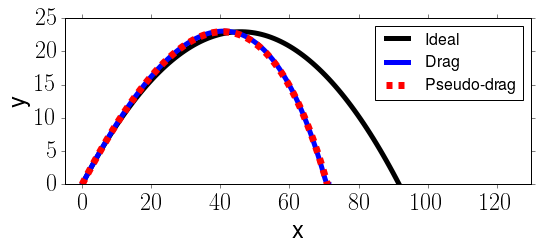

In [25]:
# HELPER FUNCTIONS
def ball_trajectory_with_drag(v0, theta, dt, t1):
    # drag parameters
    mass = 0.15
    r = 0.0366
    c = 0.5
    A = np.pi * r * r
    rho = 1.293
    global GRAVITY

    x = 0
    y = 0
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    ax = 0
    ay = -GRAVITY

    T = np.arange(dt,t1,dt)
    X = np.zeros( (T.shape[0]+1, 5) )
    X[0,:] = (0, x, y, vx, vy)

    print X[0,:]

    for i,t in enumerate(T):
        x += vx * dt + 0.5*ax*dt*dt
        y += vy * dt + 0.5*ay*dt*dt
        vx += ax*dt
        vy += ay*dt

        v = np.array( [vx,vy] ) 
        ax, ay = [0, -GRAVITY] - v*v * 0.5 * rho * c * A/mass

        y = 0.0 if y <= 0 else y

        X[i+1,:] = (t, x, y, vx, vy)

    return X[:i+1,:]

# %pylab inline

V_ = 30
theta_ = np.pi/4
T_ = concrete_case(T, V_, theta_)

tau_x, t_range, dt= concrete_trajectory(xb, V_, theta_, T_, 0)
tau_y, t_range, dt= concrete_trajectory(yb, V_, theta_, T_, 0)
tau_x_eps, t_range, dt= concrete_trajectory(xb_e.subs(eps_x,-1.11), V_, theta_, T_, 0)

tau_drag = ball_trajectory_with_drag(V_*1.11, theta_, dt=dt, t1=T_)

# import matplotlib
# matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True
# matplotlib.rcParams['text.usetex'] = True
# #matplotlib.rcParams['text.latex.preamble'] = [\
#     #r"\usepackage{accents}",]
# matplotlib.rcParams['figure.autolayout'] = True

# from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Computer Modern Roman'], 'size': 30})

matplotlib.rcParams['font.size'] = 24

plt.figure(figsize=(8,4))
plt.plot(tau_x, tau_y, lw=5.0, c="k", ls='-', label="Ideal")
plt.plot(tau_drag[:,1], tau_drag[:,2], lw=5.0, c="b", label="Drag")
plt.plot(tau_x_eps, tau_y, lw=7.0, c="r", ls='--', label="Pseudo-drag")
plt.legend(fontsize=16)#, loc='upper right', bbox_to_anchor=(0.5, 0.5))
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5, 130)
plt.ylim(0, 25) #np.max(tau_y))

plt.savefig("pseudo_drag_trajectory.pdf")

We see that the pseudo-drag trajectory (red) which is computed by adding $\varepsilon(t)=-1.11 t^2$ to $x_b$ is highly similar to a ball trajectory with drag (blue).

#### Multiplicative Noise

It is similarly easy to show, that multiplicative noise can be compensated by the agent, too.

In [26]:
eps_x = sp.Function("varepsilon")(t)
xb_e = xb*eps_x

tan_alpha_eq_e =  yb/(a-xb_e)
eq_e = tan_alpha_eq_e - linear_rv_eq
agent_t_e = sp.solve(zero_yb0(eq_e), a)[0]
agent_t_e

sp.simplify(agent_t_e - agent_t)

Note that these results only hold if the agent does not have any velocity or acceleration constraints which prevent it from executing the action required to compensate the disturbance.

## Lemma 4.1.4 (Deviating from Consistent $\vvarefcon$)

### Example

We have previously shown that for given $a_0$ there exists an $\vvaref = \frac{\nu}{a_0} \sin \varphi$ which will result in the agent running towards the impact point with constant speed. But what if given an initial position $a_0$ we use a different $\vvarefincon \neq \vvaref$ for control?

In [27]:
# CONCRETE EXAMPLE
N = 100

V_ = 30.
theta_ = np.pi/4
yb0_ = 1e-15 # 0 is undefined!
D_ = 10.

eq_yb0 = sympy_sqrt_fix(eq.subs(yb0, yb0_))

agent_t = sp.solve(eq, a)[0]

R_ = concrete_case(sympy_sqrt_fix(R.subs(yb0, yb0_)), V_, theta_, yb0_)
T_ = concrete_case(sympy_sqrt_fix(T.subs(yb0, yb0_)), V_, theta_, yb0_)
a0_ = R_+D_ # 5m right of landing point

adot0_ = sp.simplify( (R_ - a0_ ) / T_)

rv_const_speed_eq = eq_yb0.subs(a, adot0_*t + a0)
rv_const_speed_eq = sp.simplify(sp.solve(rv_const_speed_eq, rv)[0])

rv_const_speed_ = concrete_case(rv_const_speed_eq, V_, theta_, yb0_).subs(a0, a0_).subs(t,0)
agent_tau_const_speed, t_range, dt = concrete_trajectory(agent_t.subs(rv, rv_const_speed_).subs(a0, a0_),  V_, theta_, T_, yb0_)

We calculated the consistent reference $\vvarefcon$ as follows:

In [28]:
rv_const_speed_

In [29]:
print "R=%f" % R_

R=91.743119


We check the first and last steps of the agent's trajectory and see that the agent arrives at the impact point:

In [30]:
agent_tau_const_speed[:5], agent_tau_const_speed[-5:,]

(array([101.743119266055, 101.642109165045, 101.541099064035,
        101.440088963025, 101.339078862015], dtype=object),
 array([92.1471596700954, 92.0461495690853, 91.9451394680753,
        91.8441293670651, 91.7431192660550], dtype=object))

Now we investigate what happens if we alter $\vvarefcon$ and observe the agent's trajectory using $\vvarefincon = \vvarefcon + \delta$.

In [31]:
N = 1000
delta_ = -0.02

rv_tilde_ = rv_const_speed_+delta_
agent_tau_const_speed_tilde, t_range, dt = concrete_trajectory(agent_t.subs(rv, rv_tilde_).subs(a0, a0_),  V_, theta_, T_, yb0_, N)

Again we check the trajectory:

In [32]:
agent_tau_const_speed_tilde[:5], agent_tau_const_speed_tilde[-5:], 

(array([101.743119266055, 112.517462570583, 112.496646595328,
        112.475830620073, 112.455014644818], dtype=object),
 array([91.8263831670752, 91.8055671918202, 91.7847512165651,
        91.7639352413101, 91.7431192660550], dtype=object))

Again, the agent reaches the ball - but it moves with very large acceleration in the opposite direction, i.e. <i>away</i> from the ball impact point -  to position $\azeroincon \approx 125$. We now show that for starting posiition  $\azeroincon$, $\vvarefincon$ would be the optimal reference velocity.

In [33]:
# CONCRETE EXAMPLE
N = 1000

R_tilde = concrete_case(sympy_sqrt_fix(R.subs(yb0, yb0_)), V_, theta_, yb0_)
T_tilde = concrete_case(sympy_sqrt_fix(T.subs(yb0, yb0_)), V_, theta_, yb0_)
a0_tilde = agent_tau_const_speed_tilde[1]

adot0_tilde = sp.simplify( (R_tilde - a0_tilde ) / T_tilde)

rv_const_speed_tilde = concrete_case(rv_const_speed_eq, V_, theta_, yb0_).subs(a0, a0_tilde).subs(t,0)
rv_const_speed_tilde

In [34]:
rv_tilde_

In conclusion, we can predict the behavior of an agent that compensates an inconsistent $\vvaref$. It will run to the corresponding starting position $\azeroincon$ as fast as possible. It also shows that setting $\vvaref$ to an arbitrary value such as suggested by (Marken, 2001) can lead to undesired behavior.  

Our simulation experiments show that this behavior also occurs when imposing agent velocity and acceleration constraints (see below).

### Proof of Lemma 4.1.4 (Using Observed Value of $\dvva$)

Instead of setting $\vvaref$ to an arbitrary value, how much is the agent off the consistent $\vvarefcon$ if it observes $\dvva$ before starting to run and then uses this quantity as an estimate of $\vvarefcon$?

Let us assume the agent can perfectly observe $\vvarefincon = \dvva$ after 1% of the trajectory. This would compute as follows:

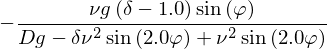

In [35]:
D = sp.symbols("D")
pc = sp.symbols("\delta")
#pc = 0.01
#pc = 0.025
T_pc = sympy_sqrt_fix(pc*T.subs(yb0,0)) # t=1% of trajectory

# simplify: assume yb0=0
eq_yb0 = sympy_sqrt_fix(eq.subs(yb0,0))

# real rv at impact point
#rv_expr = sp.solve(eq_yb0.subs(a, sympy_sqrt_fix(R.subs(yb0,0))), rv)[0]
# rv observed at a0 after 1% of trajectory

#rv_expr_pc = sp.simplify(sp.solve(eq_yb0.subs(a, a0).subs(t, T_pc), rv)[0])
rv_expr_pc = sp.simplify(sp.solve(eq_yb0.subs(a, zero_yb0(R)+D).subs(t, T_pc), rv)[0])

##print (sp.latex(rv_expr_pc))
rv_expr_pc

$ = \vvarefincon$

($D$ denotes the agent's distance to the impact point)

<!--
(Why is there an $a_0$ in the equation? Because rv_tilde of course depends on where the agent is standing when observing it - and we assume that the agent did not move yet, therefore there is a0.)
-->

Let's compute $\tilde{a}_0$, i.e. the position the agent implicitly assumes to be at when using this rv:

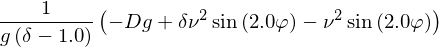

In [36]:
# old a0
a0_expr= sp.solve(rv_opt - rv, a0)[0]

# a0_tilde: a0 when using rv_tilde (=rv_expr_pc) instead of rv
a0_tilde_expr = sp.simplify(a0_expr.subs(rv, rv_expr_pc))
##print (sp.latex(a0_tilde_expr))
a0_tilde_expr

$= \azeroincon$.

<!--- 
(Why is there still an $a_0$ in the equation? If rv_tilde depends on a0, also a0_tilde does!)
-->

Now let's look at the difference $\azeroincon - \azero$, i.e. how far the position that the agent implicitly assumes to be at is from the real $\azero$:

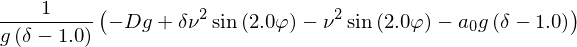

In [37]:
a0_diff =  sp.simplify(a0_tilde_expr - a0_expr)
a0_diff =  sp.simplify(a0_diff.subs(rv, rv_opt))

a0_diff

$= \azeroincon - \azero$.

Let's substitute $a_0$ by the known position of the agent, namely $R+D$:

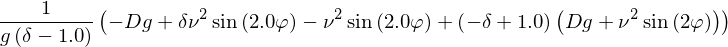

In [38]:
a0_diff_D = sp.simplify(a0_diff.subs(a0, zero_yb0(R) + D))
a0_diff_D


We can further simplify that:

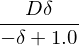

In [39]:
a0_diff_D = a0_diff_D.subs(sp.sin(2.0*theta), sp.sin(2*theta)) # some sympy bug?
a0_diff_D

a0_diff_D2 = a0_diff_D
a0_diff_D = pc*D / (1.0-pc)

assert (sp.simplify(a0_diff_D - a0_diff_D2) == 0)

a0_diff_D

$= \azeroincon - \azero$.

This means that the offset that the agent will try to compensate by running does not depend on the initial angle or velocity of the ball. It only depends on how far the agent is from the impact point and how long it waits.

#### Figure 4.3

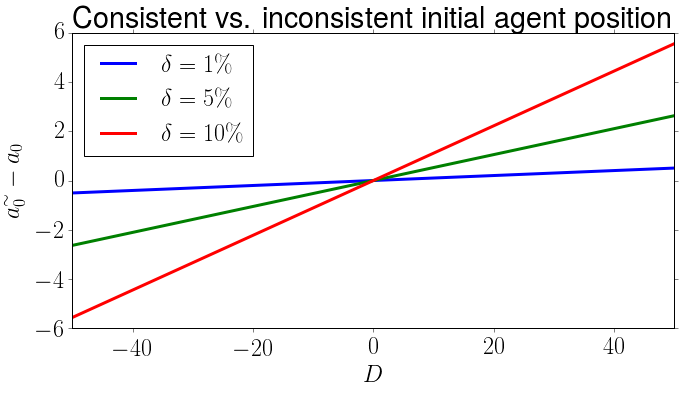

In [40]:
#pc_ = np.linspace(0,1, 50)
pc_ = 0.01
D_ = np.linspace(-50, 50, 5)

matplotlib.rcParams['font.size'] = 24
plt.figure(figsize=(10,6))
plt.plot( D_, [ a0_diff_D.subs(pc, 0.01).subs(D, D__).evalf() for D__ in D_], lw=3.0, label="$\delta=1\%$" )
plt.plot( D_, [ a0_diff_D.subs(pc, 0.05).subs(D, D__).evalf() for D__ in D_], lw=3.0, label="$\delta=5\%$"  )
plt.plot( D_, [ a0_diff_D.subs(pc, 0.1).subs(D, D__).evalf() for D__ in D_], lw=3.0, label="$\delta=10\%$"  )
plt.xlabel("$D$")
plt.ylabel(r"${a_0^{\sim}} - a_0$")
plt.xlim([-50,50])
plt.title("Consistent vs. inconsistent initial agent position")
plt.legend(loc=2, fontsize=24)

plt.tight_layout()
plt.savefig("tilde_a0_error.pdf")


Let us look at how this value scales with $\nu$ and $d = R-a_0$ with fixed $\varphi=\frac{\pi}{4}$:

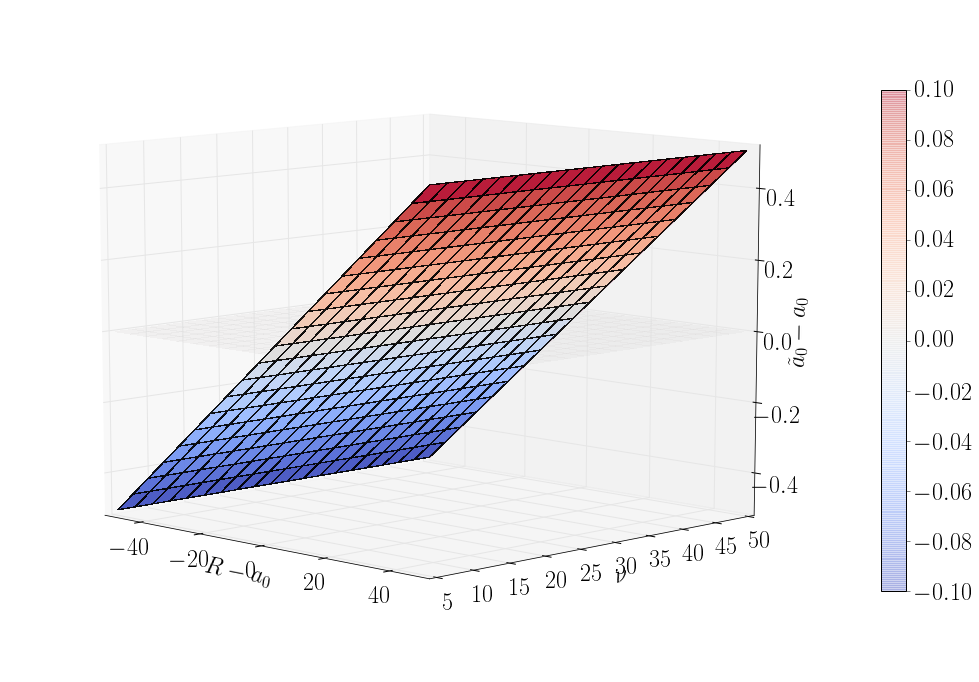

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#%pylab tk
#%pylab inline

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

X = np.linspace(-50, 50, 20)  # distance d
Y = np.linspace(5, 50, 20)    # ball velocity V 

t_ = pc
#theta_ = np.pi/4
theta_ = 3*np.pi/8
yb0_ = 0.0
pc_ = 0.01

DIFF = np.zeros( (len(X), len(Y)) ) 
ZERO = np.zeros( (len(X), len(Y)) ) 

for i,d_ in enumerate(X):
    for j,V_ in enumerate(Y):

        R_ = concrete_case(R, V_, theta_, yb0_)
        T_ = concrete_case(T, V_, theta_, yb0_)
#        cc = concrete_case(rv_diff,  V_, theta_, yb0_).subs(t, t_)
#        cc = concrete_case(a0_diff,  V_, theta_, yb0_).subs(t, t_)
        cc = concrete_case(a0_diff_D,  V_, theta_, yb0_).subs(t, t_)
        cc = cc.subs(pc, pc_)

        #DIFF[i,j] = float(cc.subs(dist0,d_).subs(t,t_))
#         if np.abs(d_) >= R_:
#             DIFF[i,j] = 1. #np.nan
        if True:
            #val = cc.subs(a0,R_+d_).evalf()
            val = cc.subs(D,d_).evalf()
            #DIFF[i,j] = np.abs(float(val)) if val != sp.zoo else 0.
            DIFF[i,j] = float(val) if val != sp.zoo else 0.
            # clamp diff
            #DIFF[i,j] = DIFF[i,j] if DIFF[i,j] <= 1 else 1
DIFF = DIFF.T
    
X,Y = np.meshgrid(X,Y)

# clamp diff
    
p = ax.plot_surface(X,Y, DIFF, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0.3, antialiased=False, alpha=0.9)
#cb = fig.colorbar(p, shrink=0.5)
ax.set_xlabel("$R - a_0$")
ax.set_ylabel(r"$\nu$")
ax.set_zlabel(r"$\tilde{a}_0 - a_0$")
#ax.set_zlim3d(0, 1)
ax.set_zlim3d(-0.5, 0.5)

p = ax.plot_surface(X,Y, ZERO, rstride=1, cstride=1, cmap=plt.cm.coolwarm, antialiased=False,
                    alpha=0.25, linewidth=0.0)


Z = DIFF
#if np.min(Z) != np.max(Z):
#  cset = ax.contour(X, Y, Z, zdir='z', offset=np.min(Z), cmap=cm.coolwarm)
#if np.min(X) != np.max(X):
if True:
  #cset = ax.contour(X, Y, Z, zdir='x', offset=np.min(X), cmap=cm.coolwarm)
  #cset = ax.contour(X, Y, Z, zdir='x', offset=np.max(X), cmap=cm.coolwarm) # project to opposite side
#if np.min(Y) != np.max(Y):
  #cset = ax.contour(X, Y, Z, zdir='y', offset=np.min(Y), cmap=cm.coolwarm)
  cset = ax.contour(X, Y, Z, zdir='y', offset=np.max(Y), cmap=cm.coolwarm) # project to opposite side

cb = fig.colorbar(p, shrink=0.75, aspect=20)

#ax.view_init(elev=15., azim=45.)
ax.view_init(elev=10., azim=-45.)
#ax.view_init(elev=1., azim=1.)



ax.xaxis._axinfo['label']['space_factor'] = 2.5
ax.yaxis._axinfo['label']['space_factor'] = 2.5
ax.zaxis._axinfo['label']['space_factor'] = 2.0

plt.tight_layout()

#plt.savefig("a0_tilde_diff.pdf" % pi_slug)
#plt.show()


<!--
We see that the difference between the observed and the "true" $rv$ moderately increases with the distance to the target and dramatically increases with low initial velocity $V$. We also see that negative distances $d$ affect $rv$ more than positive distances. Again, this is due to the fact that for negative $d$ the agent is closer to the ball's starting position.

To conclude, choosing arbitrary $rv$ at the beginning of the trajectory will usually generate good behavior. However, short ball trajectories with low initial velocity will be hard to catch.
-->